# ***CARGA DE DATOS***

In [16]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [5]:

df1= pd.read_csv('data/casos_dengue_PIURA.csv', delimiter=';')
df1

,departamento,anio,semana,n_casos,tipo
0,PIURA,2017,1,35,dengue
1,PIURA,2017,2,41,dengue
2,PIURA,2017,3,43,dengue
3,PIURA,2017,4,49,dengue
4,PIURA,2017,5,77,dengue
...,...,...,...,...,...
311,PIURA,2022,49,31,dengue
312,PIURA,2022,50,27,dengue
313,PIURA,2022,51,40,dengue
314,PIURA,2022,52,28,dengue


In [7]:
df2= pd.read_csv('data/dataset_piura_met.csv', delimiter=';')
df2

,anio,semana,precipitacion,temp. Max,temp. Min,humedad
0,2017,1,0,36.4,22.8,73.6
1,2017,2,0,37.0,23.8,69.8
2,2017,3,4,37.4,23.8,77.9
3,2017,4,0,36.6,24.0,76.1
4,2017,5,16,36.8,24.3,91.6
...,...,...,...,...,...,...
311,2022,49,0,35.0,19.8,73.4
312,2022,50,0,33.0,17.9,70.1
313,2022,51,0,34.8,21.7,69.2
314,2022,52,0,35.2,21.7,68.8


In [11]:
print(df1.head()) #casos_dengue_PIURA.csv
print(df2.head()) #dataset_piura_met.csv'

  departamento  anio  semana  n_casos    tipo
0        PIURA  2017       1       35  dengue
1        PIURA  2017       2       41  dengue
2        PIURA  2017       3       43  dengue
3        PIURA  2017       4       49  dengue
4        PIURA  2017       5       77  dengue
   anio  semana  precipitacion  temp. Max  temp. Min  humedad 
0  2017       1              0       36.4       22.8      73.6
1  2017       2              0       37.0       23.8      69.8
2  2017       3              4       37.4       23.8      77.9
3  2017       4              0       36.6       24.0      76.1
4  2017       5             16       36.8       24.3      91.6


# ***VERIFICACION DE VALORES NULOS***

In [12]:
# Verificar si hay valores nulos en los dos datasets
print("Valores nulos en el dataset de casos de dengue:")
print(df1.isnull().sum())  # Muestra cuántos valores nulos hay por columna

print("\nValores nulos en el dataset meteorológico:")
print(df2.isnull().sum())  # Muestra cuántos valores nulos hay por columna

# Verificar si hay duplicados
print("\nDuplicados en el dataset de casos de dengue:")
print(df1.duplicated().sum())  # Muestra cuántas filas duplicadas hay

print("\nDuplicados en el dataset meteorológico:")
print(df2.duplicated().sum())  # Muestra cuántas filas duplicadas hay

Valores nulos en el dataset de casos de dengue:
departamento    0
anio            0
semana          0
n_casos         0
tipo            0
dtype: int64

Valores nulos en el dataset meteorológico:
anio             0
semana           0
precipitacion    0
temp. Max        0
temp. Min        0
humedad          0
dtype: int64

Duplicados en el dataset de casos de dengue:
0

Duplicados en el dataset meteorológico:
0


In [13]:
# Verificar y eliminar valores nulos (si existen)
casos_dengue_piura = df1.dropna()  # Elimina las filas que tengan valores nulos
dataset_piura_met = df2.dropna()    # Elimina las filas que tengan valores nulos

# Verificar si hay duplicados y eliminarlos
df1 = df1.drop_duplicates()  # Elimina filas duplicadas
df2 = df2.drop_duplicates()    # Elimina filas duplicadas

# Mostrar las primeras filas después de la limpieza para verificar
print("Dataset de casos de dengue después de la limpieza:")
df1.head()

print("\nDataset meteorológico después de la limpieza:")
df2.head()

Dataset de casos de dengue después de la limpieza:

Dataset meteorológico después de la limpieza:


,anio,semana,precipitacion,temp. Max,temp. Min,humedad
0,2017,1,0,36.4,22.8,73.6
1,2017,2,0,37.0,23.8,69.8
2,2017,3,4,37.4,23.8,77.9
3,2017,4,0,36.6,24.0,76.1
4,2017,5,16,36.8,24.3,91.6


# ***Unificación de los datos***

In [14]:

# Unir los dos datasets usando las columnas comunes "anio" y "semana"
# Esto hará un merge entre los datos de dengue y los datos meteorológicos
df3= pd.merge(df1, df2, on=['anio', 'semana'])

# Mostrar las primeras filas del nuevo dataset combinado
#from google.colab import data_table
#data_table.enable_dataframe_formatter()

# Mostrar la tabla combinada
df3.head()

,departamento,anio,semana,n_casos,tipo,precipitacion,temp. Max,temp. Min,humedad
0,PIURA,2017,1,35,dengue,0,36.4,22.8,73.6
1,PIURA,2017,2,41,dengue,0,37.0,23.8,69.8
2,PIURA,2017,3,43,dengue,4,37.4,23.8,77.9
3,PIURA,2017,4,49,dengue,0,36.6,24.0,76.1
4,PIURA,2017,5,77,dengue,16,36.8,24.3,91.6


In [42]:
df3.to_csv("data/casos_dengue_unificado.csv", index=None)

# ***Análisis exploratorio de los datos (EDA)***
Ahora que hemos unificado los datos, es hora de hacer un análisis exploratorio de datos (EDA). Esto implica explorar los datos para comprender mejor su estructura, observar patrones, distribuciones y relaciones entre las variables.

Estadísticas descriptivas del dataset combinado:
              anio      semana      n_casos  precipitacion   temp. Max  \
count   316.000000  316.000000   316.000000     316.000000  316.000000   
mean   2019.515823   27.015823   163.531646       0.363924   32.782278   
std       1.704263   15.368378   563.043765       2.576542    2.732149   
min    2017.000000    1.000000     0.000000       0.000000   24.600000   
25%    2018.000000   14.000000     2.000000       0.000000   30.600000   
50%    2020.000000   27.000000    15.500000       0.000000   32.600000   
75%    2021.000000   40.000000    62.000000       0.000000   35.000000   
max    2022.000000   53.000000  4912.000000      37.000000   38.800000   

        temp. Min    humedad   
count  316.000000  316.000000  
mean    20.027215   75.916139  
std      2.575468    5.007051  
min     15.600000   64.300000  
25%     17.900000   72.300000  
50%     19.450000   75.850000  
75%     22.200000   78.900000  
max     25.500000   93.60000

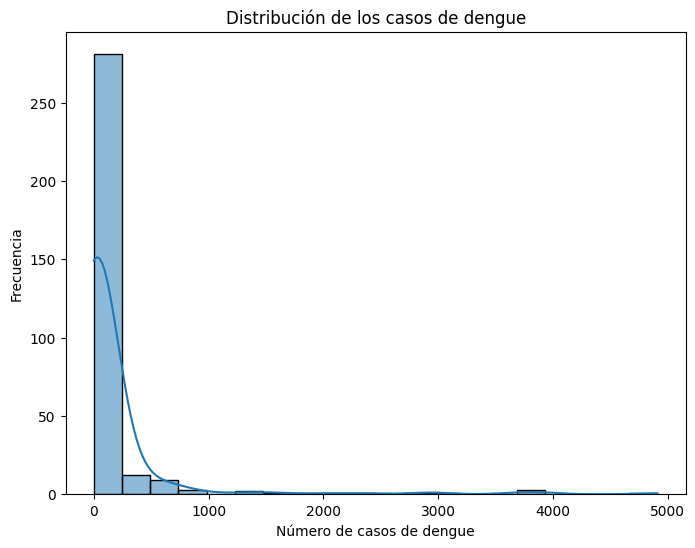

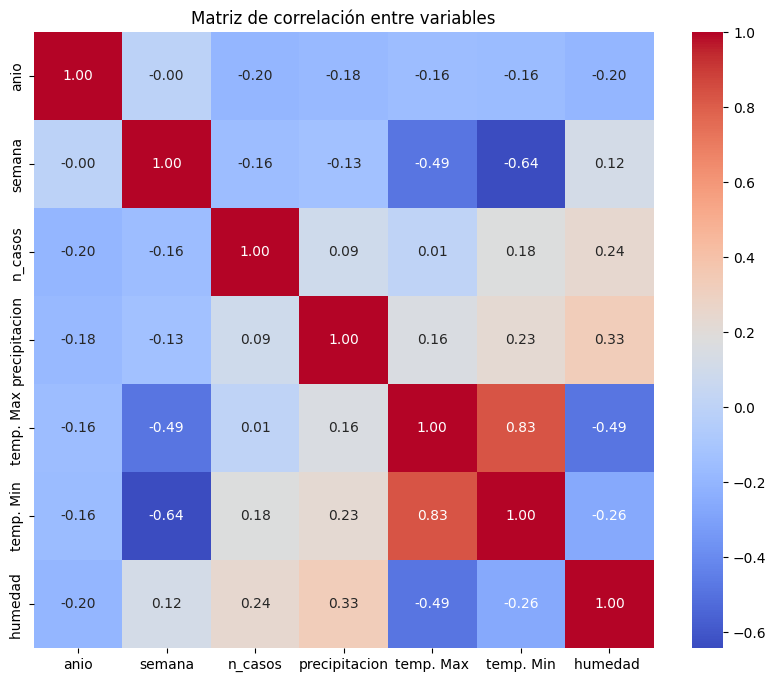

In [17]:
# Paso 5.1: Describir las estadísticas generales
print("Estadísticas descriptivas del dataset combinado:")
print(df3.describe())

# Paso 5.2: Visualizar la distribución de casos de dengue
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de la distribución de casos de dengue
plt.figure(figsize=(8, 6))
sns.histplot(df3['n_casos'], bins=20, kde=True)
plt.title('Distribución de los casos de dengue')
plt.xlabel('Número de casos de dengue')
plt.ylabel('Frecuencia')
plt.show()

# Paso 5.3: Visualizar las correlaciones entre variables climáticas y casos de dengue

# Eliminar columnas que no son numéricas antes de calcular la matriz de correlación
datos_numericos = df3.select_dtypes(include=['float64', 'int64'])

# Mostrar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(datos_numericos.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlación entre variables')
plt.show()

# ***ANALISIS ESTADISTICO***

In [18]:
def calcular_estadisticas(grupo):
    return pd.DataFrame({
        'media': grupo.mean(),
        'mediana': grupo.median(),
        'moda': grupo.mode().iloc[0]  # Seleccionamos la primera moda en caso de múltiples valores
    })

# Agrupar los datos por año y aplicar la función de estadísticas
estadisticas_por_anio = df3.groupby('anio')[['precipitacion', 'temp. Max', 'temp. Min', 'humedad ', 'n_casos']].apply(calcular_estadisticas)

# Mostrar el resumen de estadísticas por año
#from google.colab import data_table
#data_table.enable_dataframe_formatter()

# Mostrar la tabla con las estadísticas
estadisticas_por_anio

media  mediana  moda
anio                                         
2017 precipitacion    1.921569      0.0   0.0
     temp. Max       32.617647     32.2  29.4
     temp. Min       20.507843     19.8  17.3
     humedad         79.937255     79.2  75.5
     n_casos        713.235294     77.0  22.0
2018 precipitacion    0.018868      0.0   0.0
     temp. Max       33.483019     33.0  33.0
     temp. Min       20.203774     20.0  18.0
     humedad         73.550943     74.1  76.8
     n_casos          9.377358      4.0   1.0
2019 precipitacion    0.207547      0.0   0.0
     temp. Max       34.047170     33.6  35.0
     temp. Min       20.435849     19.9  19.9
     humedad         75.764151     77.3  78.2
     n_casos          2.037736      1.0   1.0
2020 precipitacion    0.056604      0.0   0.0
     temp. Max       32.609434     31.6  31.6
     temp. Min       20.096226     19.8  16.6
     humedad         76.060377     75.6  71.0
     n_casos          2.490566      2.0   1.0
2021 precipitacion    0.037736      0.0   0.0
     temp. Max       31.622642     31.4  30.0
     temp. Min       19.903774     19.4  19.4
     humedad         76.101887     76.4  72.3
     n_casos         73.056604     62.0  52.0
2022 precipitacion    0.000000      0.0   0.0
     temp. Max       32.307547     31.6  29.8
     temp. Min       19.033962     18.1  16.7
     humedad         74.233962     74.9  77.8
     n_casos        201.735849     61.0  20.0

In [19]:
# Agrupar los datos por año y calcular la media, mediana y moda para las variables clave
estadisticas_por_anio = df3.groupby('anio')[['precipitacion', 'temp. Max', 'temp. Min', 'humedad ', 'n_casos']].agg(['mean', 'median', lambda x: x.mode()[0]])

# Renombrar la columna de la moda correctamente
estadisticas_por_anio.columns = ['_'.join(col).strip() for col in estadisticas_por_anio.columns]
estadisticas_por_anio = estadisticas_por_anio.rename(columns=lambda col: col.replace('<lambda_0>', 'mode'))

# Mostrar la tabla de estadísticas
#from google.colab import data_table
#data_table.enable_dataframe_formatter()

# Mostrar la tabla
estadisticas_por_anio


,precipitacion_mean,precipitacion_median,precipitacion_mode,temp. Max_mean,temp. Max_median,temp. Max_mode,temp. Min_mean,temp. Min_median,temp. Min_mode,humedad _mean,humedad _median,humedad _mode,n_casos_mean,n_casos_median,n_casos_mode
anio,,,,,,,,,,,,,,,
2017,1.921569,0.0,0,32.617647,32.2,29.4,20.507843,19.8,17.3,79.937255,79.2,75.5,713.235294,77.0,22
2018,0.018868,0.0,0,33.483019,33.0,33.0,20.203774,20.0,18.0,73.550943,74.1,76.8,9.377358,4.0,1
2019,0.207547,0.0,0,34.047170,33.6,35.0,20.435849,19.9,19.9,75.764151,77.3,78.2,2.037736,1.0,1
2020,0.056604,0.0,0,32.609434,31.6,31.6,20.096226,19.8,16.6,76.060377,75.6,71.0,2.490566,2.0,1
2021,0.037736,0.0,0,31.622642,31.4,30.0,19.903774,19.4,19.4,76.101887,76.4,72.3,73.056604,62.0,52
2022,0.000000,0.0,0,32.307547,31.6,29.8,19.033962,18.1,16.7,74.233962,74.9,77.8,201.735849,61.0,20


In [20]:
# Obtener la estadística descriptiva de los datos combinados
estadistica_descriptiva = df3.describe()

# Mostrar la tabla de estadística descriptiva
#from google.colab import data_table
#data_table.enable_dataframe_formatter()

# Mostrar la tabla
estadistica_descriptiva


,anio,semana,n_casos,precipitacion,temp. Max,temp. Min,humedad
count,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000,316.000000
mean,2019.515823,27.015823,163.531646,0.363924,32.782278,20.027215,75.916139
std,1.704263,15.368378,563.043765,2.576542,2.732149,2.575468,5.007051
min,2017.000000,1.000000,0.000000,0.000000,24.600000,15.600000,64.300000
25%,2018.000000,14.000000,2.000000,0.000000,30.600000,17.900000,72.300000
50%,2020.000000,27.000000,15.500000,0.000000,32.600000,19.450000,75.850000
75%,2021.000000,40.000000,62.000000,0.000000,35.000000,22.200000,78.900000
max,2022.000000,53.000000,4912.000000,37.000000,38.800000,25.500000,93.600000


In [25]:
# Crear un resumen de estadísticas descriptivas personalizadas
resumen_estadisticas = []

# Calcular las estadísticas para cada año
for year in range(2017, 2023):  # Vamos de 2017 a 2022
    # Filtrar los datos por año
    filtered_df = df3[df3['anio'] == year]

    # Calcular las estadísticas
    max_casos = filtered_df['n_casos'].max()
    min_casos = filtered_df['n_casos'].min()
    rango = max_casos - min_casos
    first_q = filtered_df['n_casos'].quantile(0.25)
    median = filtered_df['n_casos'].median()
    third_q = filtered_df['n_casos'].quantile(0.75)
    iqr = third_q - first_q
    varianza = filtered_df['n_casos'].var()
    std_dev = filtered_df['n_casos'].std()

    # Añadir los resultados a la lista
    resumen_estadisticas.append({
        'Año': year,
        'Máximo de Casos': max_casos,
        'Mínimo de Casos': min_casos,
        'Rango': rango,
        'Primer Cuartil': first_q,
        'Mediana': median,
        'Tercer Cuartil': third_q,
        'IQR': iqr,
        'Varianza': varianza,
        'Desviación Estándar': std_dev
    })

# Convertir la lista en un DataFrame para visualizar
df_resumen_estadisticas = pd.DataFrame(resumen_estadisticas)

# Mostrar la tabla con las estadísticas
#from google.colab import data_table
#data_table.enable_dataframe_formatter()

# Mostrar la tabla
df_resumen_estadisticas


,Año,Máximo de Casos,Mínimo de Casos,Rango,Primer Cuartil,Mediana,Tercer Cuartil,IQR,Varianza,Desviación Estándar
0,2017,4912,14,4898,33.0,77.0,601.5,568.5,1.536863e+06,1239.702974
1,2018,54,0,54,1.0,4.0,13.0,12.0,1.466626e+02,12.110432
2,2019,8,1,7,1.0,1.0,3.0,2.0,1.960087e+00,1.400031
3,2020,13,0,13,1.0,2.0,3.0,2.0,5.908563e+00,2.430754
4,2021,228,1,227,46.0,62.0,88.0,42.0,2.977439e+03,54.565915
5,2022,755,15,740,31.0,61.0,380.0,349.0,5.608474e+04,236.822162


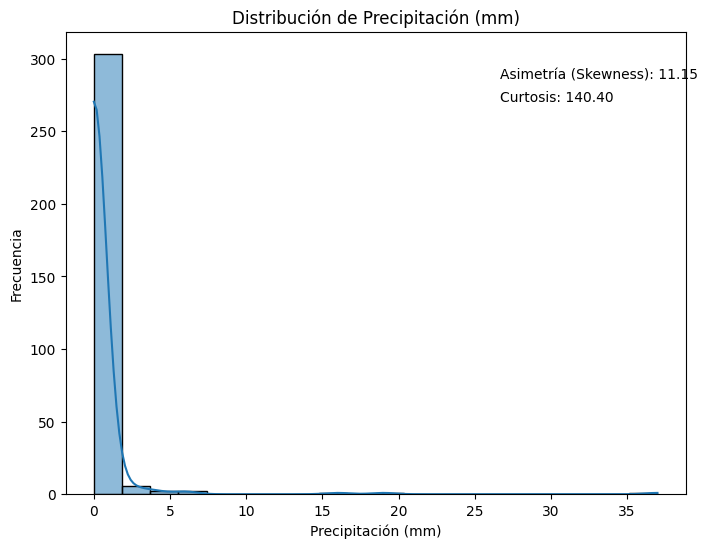

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Paso 1: Seleccionar la variable que queremos analizar (en este caso, la precipitación)
variable = df3['precipitacion']

# Paso 2: Calcular la asimetría (skewness) y la curtosis (kurtosis)
asimetria = skew(variable)
curtosis = kurtosis(variable)

# Paso 3: Crear el histograma con la distribución de la variable
plt.figure(figsize=(8, 6))
sns.histplot(variable, bins=20, kde=True)

# Añadir los valores de skewness y kurtosis en el gráfico
plt.text(x=0.7, y=0.9, s=f"Asimetría (Skewness): {asimetria:.2f}", transform=plt.gca().transAxes)
plt.text(x=0.7, y=0.85, s=f"Curtosis: {curtosis:.2f}", transform=plt.gca().transAxes)

# Añadir etiquetas y título al gráfico
plt.title('Distribución de Precipitación (mm)')
plt.xlabel('Precipitación (mm)')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()


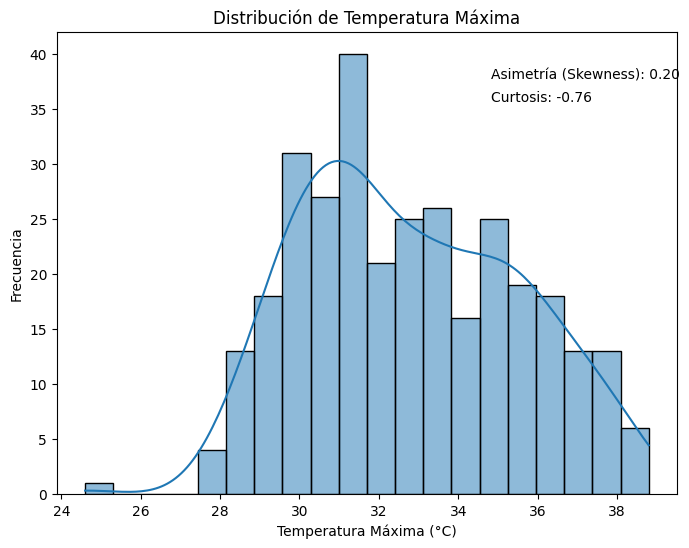

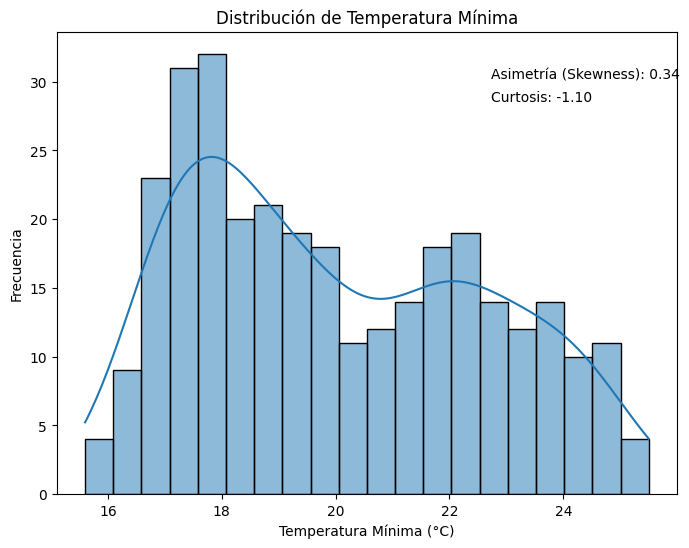

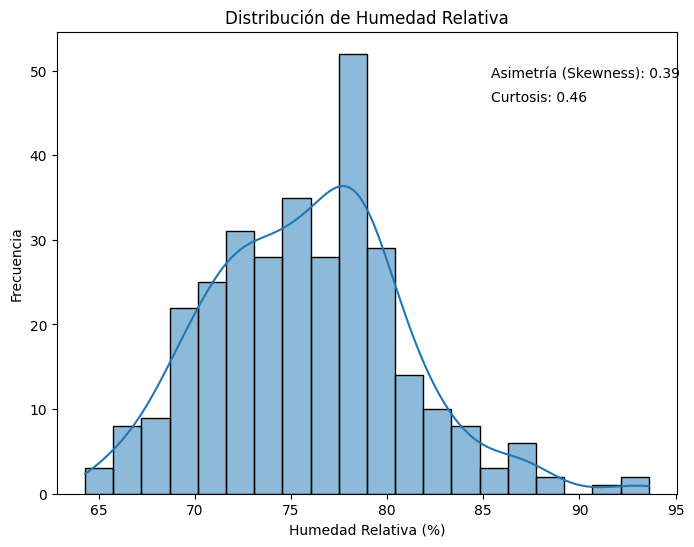

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Crear una función para generar los gráficos
def graficar_distribucion(variable, nombre_variable, xlabel):
    # Calcular la asimetría (skewness) y la curtosis (kurtosis)
    asimetria = skew(variable)
    curtosis = kurtosis(variable)

    # Crear el histograma con la distribución de la variable
    plt.figure(figsize=(8, 6))
    sns.histplot(variable, bins=20, kde=True)

    # Añadir los valores de skewness y kurtosis en el gráfico
    plt.text(x=0.7, y=0.9, s=f"Asimetría (Skewness): {asimetria:.2f}", transform=plt.gca().transAxes)
    plt.text(x=0.7, y=0.85, s=f"Curtosis: {curtosis:.2f}", transform=plt.gca().transAxes)

    # Añadir etiquetas y título al gráfico
    plt.title(f'Distribución de {nombre_variable}')
    plt.xlabel(xlabel)
    plt.ylabel('Frecuencia')

    # Mostrar el gráfico
    plt.show()

# Graficar la distribución de la temperatura máxima
graficar_distribucion(df3['temp. Max'], 'Temperatura Máxima', 'Temperatura Máxima (°C)')

# Graficar la distribución de la temperatura mínima
graficar_distribucion(df3['temp. Min'], 'Temperatura Mínima', 'Temperatura Mínima (°C)')

# Graficar la distribución de la humedad
graficar_distribucion(df3['humedad '], 'Humedad Relativa', 'Humedad Relativa (%)')


# ***Preparación de los datos para el modelado***
Antes de aplicar el modelo predictivo, necesitamos preparar los datos adecuadamente. Esto incluye:

Definir las variables de entrada (features) y la variable de salida (target): En este caso, nuestras features serán las variables climáticas (temperatura, precipitación, humedad), y la variable objetivo será el número de casos de dengue.
Dividir los datos en conjuntos de entrenamiento y prueba: Esto es esencial para evaluar el rendimiento del modelo. Utilizaremos una parte de los datos para entrenar el modelo y otra parte para probar su precisión.

<Figure size 1000x800 with 0 Axes>

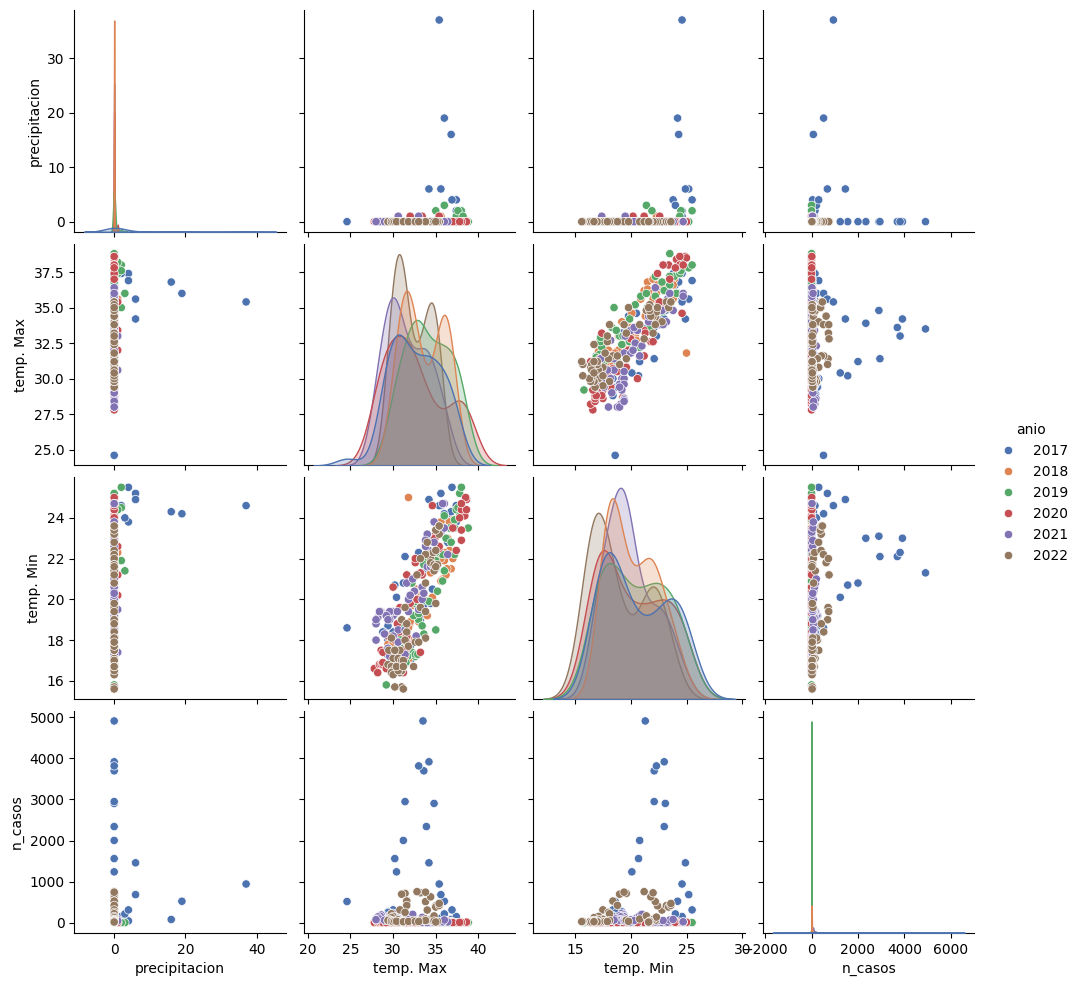

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un dataset reducido con las variables relevantes para el gráfico
datos_para_graficar = df3[['precipitacion', 'temp. Max', 'temp. Min', 'n_casos', 'anio']]

# Crear el gráfico de pares (pairplot)
plt.figure(figsize=(10, 8))
sns.pairplot(datos_para_graficar, hue='anio', palette="deep", diag_kind="kde")

# Mostrar el gráfico
plt.show()


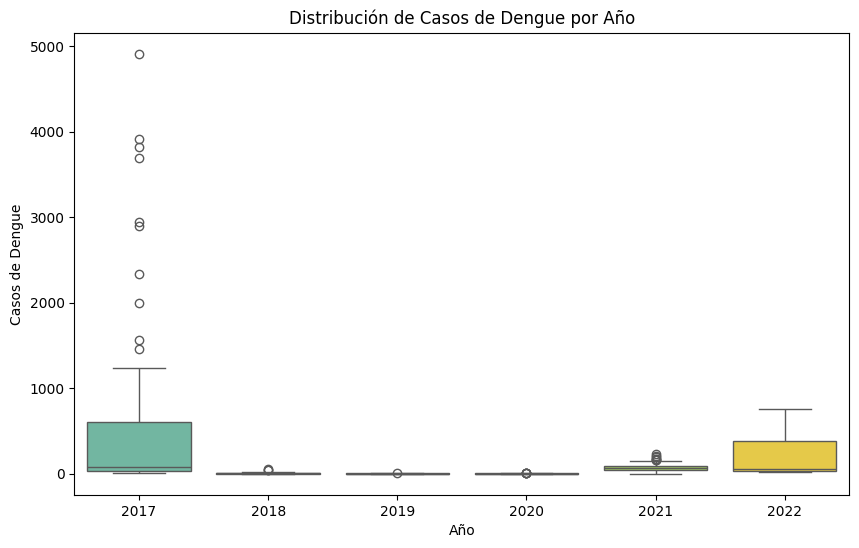

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el gráfico de caja (boxplot) para visualizar los casos de dengue por año con colores diferentes
plt.figure(figsize=(10, 6))
sns.boxplot(x='anio', y='n_casos', data=df3, hue='anio', palette='Set2', dodge=False)

# Añadir etiquetas y título
plt.title('Distribución de Casos de Dengue por Año')
plt.xlabel('Año')
plt.ylabel('Casos de Dengue')

# Desactivar la leyenda si no se necesita
plt.legend([],[], frameon=False)

# Mostrar el gráfico
plt.show()



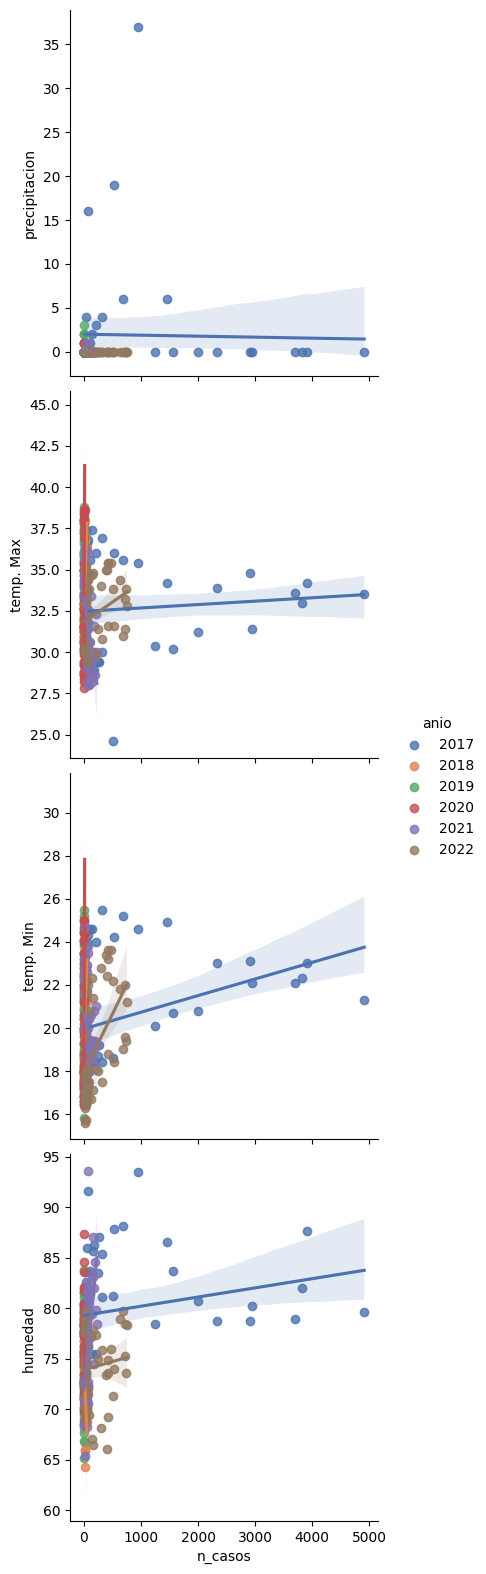

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el gráfico pairplot con regresión lineal para varias variables
sns.pairplot(df3,
             x_vars=["n_casos"],  # Casos de dengue en el eje X
             y_vars=["precipitacion", "temp. Max", "temp. Min", "humedad "],  # Variables en el eje Y
             height=4,  # Altura de cada gráfico
             kind="reg",  # Tipo de gráfico: regresión lineal
             hue="anio",  # Diferenciar por año
             palette="deep")  # Colores diferenciados por año

# Mostrar el gráfico
plt.show()


In [36]:
from sklearn.model_selection import train_test_split

# Definir las variables de entrada (X) y la variable objetivo (y)
X = df3[['precipitacion', 'temp. Max', 'temp. Min', 'humedad ']]
y = df3['n_casos']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar las dimensiones de los conjuntos de entrenamiento y prueba
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)


Tamaño del conjunto de entrenamiento: (252, 4)
Tamaño del conjunto de prueba: (64, 4)


# ***Modelo de Regresión Lineal:***

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Filtrar los datos para excluir los años 2019, 2020 y 2021
datos_filtrados = df3[(df3['anio'] < 2019)]

# Definir las variables de entrada (X) y la variable objetivo (y), excluyendo la humedad
X = datos_filtrados[['precipitacion', 'temp. Max', 'temp. Min']]
y = datos_filtrados['n_casos']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo de Regresión Lineal
modelo = LinearRegression()
modelo.fit(X_train_scaled, y_train)

# Hacer predicciones
y_pred = modelo.predict(X_test_scaled)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Mostrar las métricas del modelo
print(f"Error cuadrático medio (MSE) con regresión lineal: {mse}")
print(f"Coeficiente de determinación (R2 score) con regresión lineal: {r2}")

# Mostrar los coeficientes del modelo
print("Coeficientes del modelo:", modelo.coef_)


Error cuadrático medio (MSE) con regresión lineal: 465755.6212792679
Coeficiente de determinación (R2 score) con regresión lineal: 0.35412984920626644
Coeficientes del modelo: [ -46.59847386 -537.90774037  674.3780786 ]


# ***RANDOM FOREST***

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Filtrar los datos para excluir los años 2019, 2020 y 2021
datos_filtrados = df3[(df3['anio'] < 2019)].copy()

# Crear una nueva columna de temperatura promedio usando .loc[]
datos_filtrados.loc[:, 'temp_promedio'] = (datos_filtrados['temp. Max'] + datos_filtrados['temp. Min']) / 2

# Definir las variables de entrada (X) y la variable objetivo (y), excluyendo la humedad y usando solo la temperatura promedio
X = datos_filtrados[['precipitacion', 'temp_promedio']]
y = datos_filtrados['n_casos']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Crear y entrenar el modelo Random Forest
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(X_train_scaled, y_train)

# Hacer predicciones con el modelo Random Forest
y_pred_rf = modelo_rf.predict(X_test_scaled)

# Evaluar el rendimiento del modelo
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Mostrar las métricas del modelo
print(f"Error cuadrático medio (MSE) - Random Forest: {mse_rf}")
print(f"Coeficiente de determinación (R2 score) - Random Forest: {r2_rf}")


Error cuadrático medio (MSE) - Random Forest: 811909.0456232565
Coeficiente de determinación (R2 score) - Random Forest: -0.12588618101307936


# ***Decision Tree***

In [39]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Crear y entrenar el modelo de Árbol de Decisión
modelo_arbol = DecisionTreeRegressor(random_state=42)
modelo_arbol.fit(X_train_scaled, y_train)

# Hacer predicciones con el modelo de Árbol de Decisión
y_pred_arbol = modelo_arbol.predict(X_test_scaled)

# Evaluar el rendimiento del modelo de Árbol de Decisión
mse_arbol = mean_squared_error(y_test, y_pred_arbol)
r2_arbol = r2_score(y_test, y_pred_arbol)

# Mostrar las métricas del modelo
print(f"Error cuadrático medio (MSE) - Árbol de Decisión: {mse_arbol}")
print(f"Coeficiente de determinación (R2 score) - Árbol de Decisión: {r2_arbol}")


Error cuadrático medio (MSE) - Árbol de Decisión: 1273772.2394179893
Coeficiente de determinación (R2 score) - Árbol de Decisión: -0.7663586455277183


# ***K-Neighbors Regressor***

In [40]:
from sklearn.neighbors import KNeighborsRegressor

# Crear y entrenar el modelo K-Nearest Neighbors
modelo_knn = KNeighborsRegressor(n_neighbors=5)  # Puedes ajustar el número de vecinos según sea necesario
modelo_knn.fit(X_train_scaled, y_train)

# Hacer predicciones con el modelo K-Nearest Neighbors
y_pred_knn = modelo_knn.predict(X_test_scaled)

# Evaluar el rendimiento del modelo K-Nearest Neighbors
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

# Mostrar las métricas del modelo
print(f"Error cuadrático medio (MSE) - k-NN: {mse_knn}")
print(f"Coeficiente de determinación (R2 score) - k-NN: {r2_knn}")


Error cuadrático medio (MSE) - k-NN: 421296.859047619
Coeficiente de determinación (R2 score) - k-NN: 0.4157814668245119


Regresión Lineal:

MSE: 465,755
R²: 0.35
Mejor que los modelos de árbol de decisión y random forest, pero aún podría mejorar.

Random Forest:

MSE: 811,909
R²: -0.13
El rendimiento es bajo, indicando que el modelo no captura bien las relaciones entre las variables.

Árbol de Decisión:

MSE: 1,273,772
R²: -0.77
El peor rendimiento, posiblemente por sobreajuste o un mal ajuste a los datos.

k-NN:

MSE: 421,296
R²: 0.42
Este es el modelo más efectivo hasta ahora, con el mejor R² y MSE más bajo.

# ***Análisis:***

El modelo de k-NN ha mostrado el mejor rendimiento en comparación con los otros modelos, lo que indica que las relaciones entre las variables pueden ser mejor capturadas por este enfoque basado en vecinos cercanos. La regresión lineal también ha mostrado un rendimiento aceptable, pero parece que las relaciones no lineales entre las variables podrían estar limitando su capacidad.

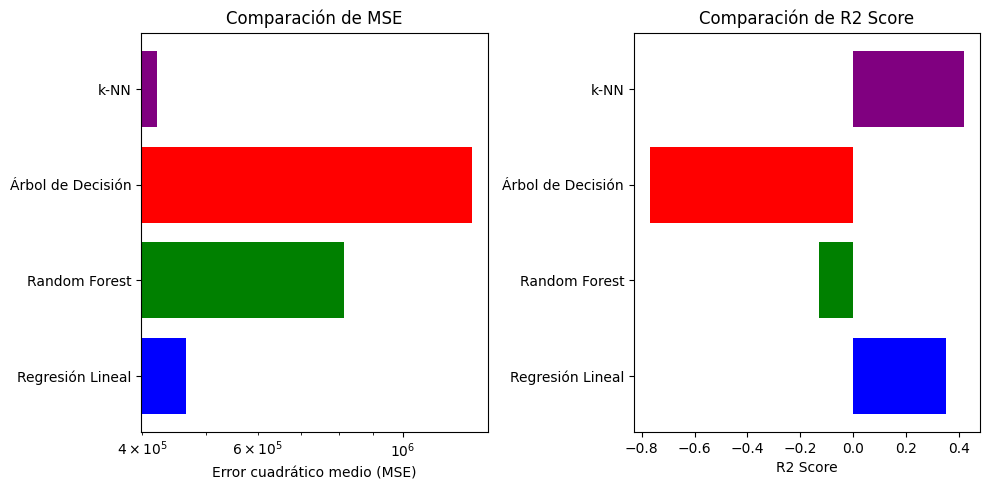

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de los modelos
modelos = ['Regresión Lineal', 'Random Forest', 'Árbol de Decisión', 'k-NN']
mse_values = [465755.62, 811909.05, 1273772.24, 421296.86]
r2_values = [0.35, -0.13, -0.77, 0.42]

# Crear un gráfico comparativo para MSE
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.barh(modelos, mse_values, color=['blue', 'green', 'red', 'purple'])
plt.title('Comparación de MSE')
plt.xlabel('Error cuadrático medio (MSE)')
plt.xscale('log')

# Crear un gráfico comparativo para R2 Score
plt.subplot(1, 2, 2)
plt.barh(modelos, r2_values, color=['blue', 'green', 'red', 'purple'])
plt.title('Comparación de R2 Score')
plt.xlabel('R2 Score')

plt.tight_layout()
plt.show()
